# Preparazione di un dataset - E2E

In questa lezione analizzeremo un dataset e lo prepareremo per i successivi passaggi di modellazione.

## 1 - Import e descrizione

Per prima cosa importiamo il nostro dataset di transazioni bancarie possibilmente fraudolente, `banking_fraud_mini.csv`, in un dataframe pandas e cerchiamo di comprendere meglio la natura delle varie feature incluse.
*NOTA*: è disponibile anche `banking_fraud.csv`, un dataset più grande da cui abbiamo estratto quello di esempio. Usiamo un dataset più piccolo per rendere l'esecuzione dei metodi più veloce, potete testare la pipeline sul dataset completo in un secondo momento.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./datasets/banking_fraud_mini.csv") # Importiamo il dataset
df.head(5) # Visualizziamo le prime 5 colonne

,customer_age,proposed_credit_limit,date_of_birth_distinct_emails_4w,name_email_similarity,foreign_request,velocity_6h,has_other_cards,credit_risk_score,intended_balcon_amount,keep_alive_session,fraud_bool,income,payment_type
0,30.0,500.0,7.0,0.499932,0.0,2763.535494,0.0,203.0,-1.217729,1.0,0,7552.067848,AC
1,30.0,1500.0,7.0,0.446073,0.0,7641.832199,0.0,92.0,-1.220035,1.0,0,10311.074682,AC
2,40.0,500.0,6.0,0.200800,0.0,4586.654178,0.0,NaN,-1.185531,0.0,0,4842.816983,AB
3,50.0,500.0,5.0,0.856145,0.0,7256.338063,0.0,188.0,-1.678104,1.0,0,5737.567515,AD
4,40.0,1000.0,13.0,0.002287,0.0,5064.447355,0.0,181.0,18.021628,1.0,0,4936.129688,AA


Possiamo già intuire i tipi delle colonne. Per avere una visione più completa possiamo applicare alcune funzioni, che per comodità abbiamo raccolto in un'unica funzione `df_info`, in modo da poterle applicare più comodamente durante l'analisi:

In [2]:
def get_info(dataframe):
    """
    Restituisce alcune informazioni di sintesi riguardo al dataset.
    """
    display(
        # concateniamo l'output delle seguenti funzioni lungo l'asse 1, quindi affianchiamo le colonne
        pd.concat(                                              
            [
                # df.dtypes restituisce il tipo di ciascuna colonna del dataframe
                dataframe.dtypes.rename("dtypes"),        
                # df.nunique() restituisce il numero di valori distinti in ciascuna colonna
                dataframe.nunique().rename("n_unique"),  
                # df.isna() restituisce una maschera con valore True quando il valore corrispondente è NaN, 
                # sum() conta il numero di valori True
                dataframe.isna().sum().rename("nan_vals"),      
                # df.describe() restituisce alcune statistiche riguardo alle colonne
                dataframe.describe().transpose()                
            ], 
            axis=1
        )
    )

Applichiamo ora la nostra nuova funzione al dataframe:

In [3]:
get_info(df)

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,9,120,14880.0,35.942876,12.869112,10.000000,30.000000,30.000000,50.000000,90.000000
proposed_credit_limit,float64,12,90,14910.0,629.987928,568.387524,190.000000,200.000000,200.000000,1000.000000,2100.000000
date_of_birth_distinct_emails_4w,float64,36,30,14970.0,8.876687,5.054016,0.000000,5.000000,8.000000,12.000000,35.000000
name_email_similarity,float64,14865,135,14865.0,0.458583,0.294766,0.000030,0.183301,0.441987,0.729261,0.999988
foreign_request,float64,2,30,14970.0,0.033534,0.180032,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,14940,60,14940.0,5523.362933,3004.732915,-19.746905,3263.103301,5181.942645,7560.228408,16122.851562
has_other_cards,float64,2,90,14910.0,0.180148,0.384323,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,453,60,14940.0,146.754752,77.519774,-168.000000,91.000000,137.000000,200.000000,376.000000
intended_balcon_amount,float64,14985,15,14985.0,7.160916,19.222751,-10.035337,-1.189888,-0.854683,-0.381135,111.158547
keep_alive_session,float64,2,15,14985.0,0.494962,0.499991,0.000000,0.000000,0.000000,1.000000,1.000000


Possiamo inoltre visualizzare le distribuzioni delle coppie di variabili:

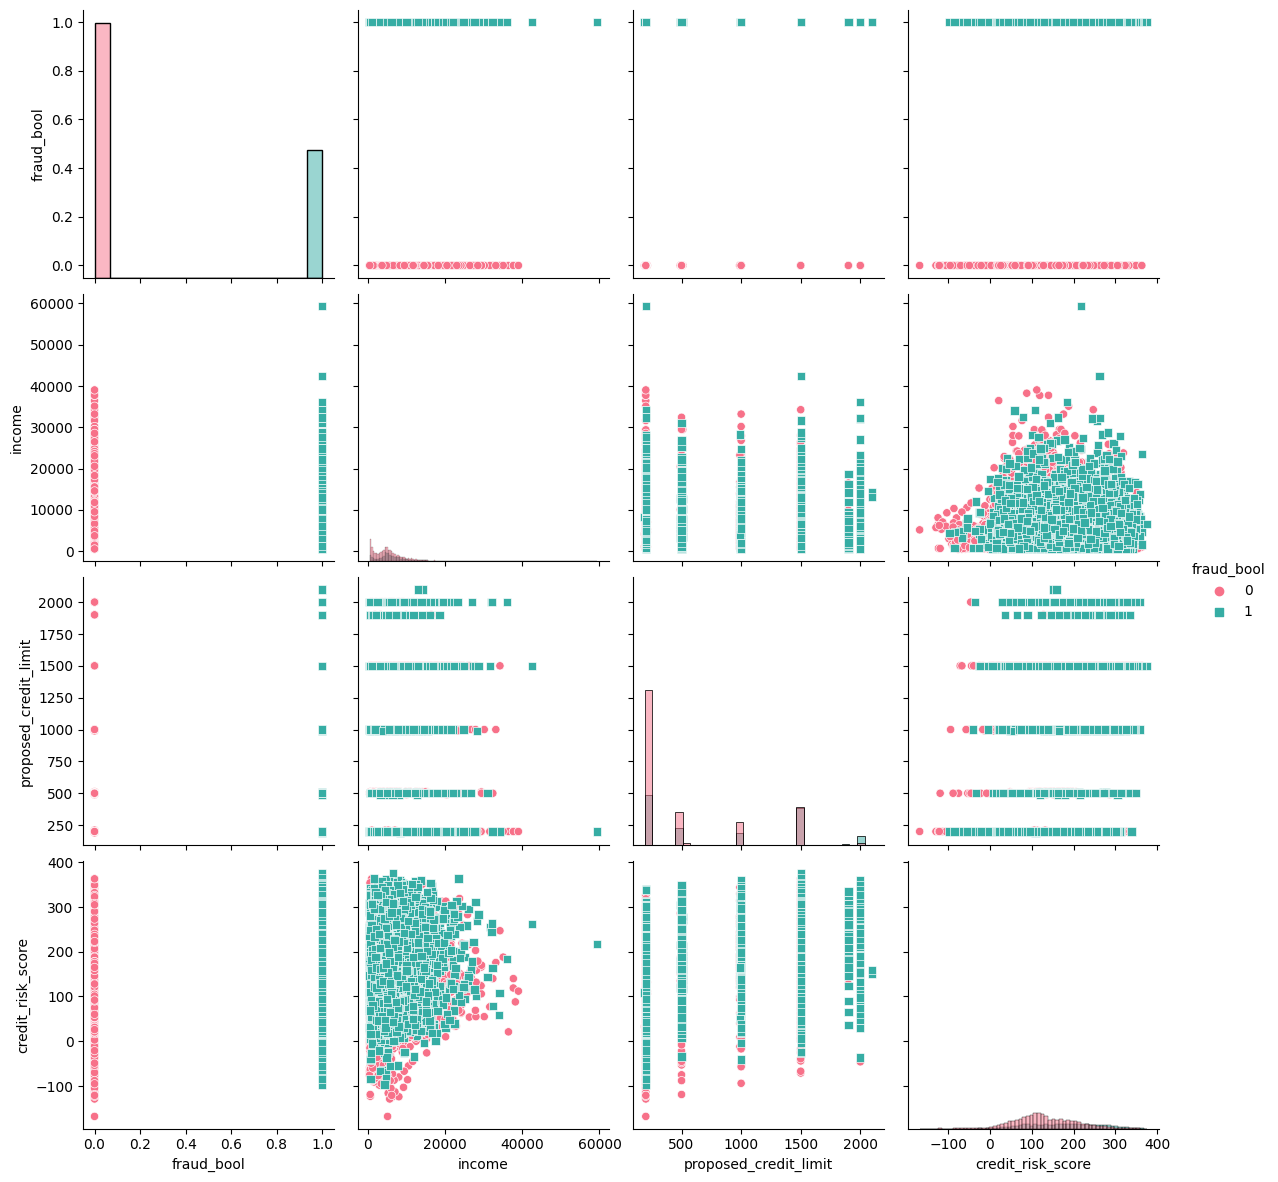

In [4]:
import seaborn as sns
sns.pairplot(
    # dataframe da plottare
    df,
    # hue: colonna con i dati per plottare colori diversi per ogni valore
    hue="fraud_bool",
    # vars: lista di colonne da plottare
    vars=["fraud_bool", "income", "proposed_credit_limit", "credit_risk_score"],
    # kind: tipo di plot, di default è scatter
    kind="scatter",
    # diag_kind: tipo di plot per la diagonale, di default è histogram
    diag_kind="hist",
    # palette: palette di colori da usare per i diversi valori di hue
    palette="husl",
    # markers: lista di markers da usare per i diversi valori di hue
    markers=["o", "s"],
    # height: altezza di ogni facet in pixel
    height=3,
    # aspect: rapporto di aspetto di ogni facet, in modo che aspect * height dia la larghezza di ogni facet in pollici
    aspect=1,
    # dropna: rimuove i valori mancanti dal plot
    dropna=False,
    # plot_kws: dizionario di argomenti di kwargs da passare alle funzioni di plotting
    plot_kws=None,
    # diag_kws: dizionario di argomenti di kwargs da passare alla funzione di plotting della diagonale
    diag_kws=None,
    # grid_kws: dizionario di argomenti di kwargs da passare al costruttore della griglia
    grid_kws=None,
)


Notiamo alcune cose:

- Lla colonna `payment_type` è di tipo `object`: dovremo trasformarla in valori numerici per favorire la modellizzazione.
- Le colonne `foreign_request`, `has_other_card`, `keep_alive_session`, `fraud_bool` sono categoriche
- Diverse colonne hanno valori mancanti: risolveremo questo problema tramite imputazione.
  
Concentriamoci ora sulla colonna di tipo `object`:

In [5]:
for column in df.select_dtypes(exclude=[int, float]):   # Cicliamo fra le colonne ti tipo `object`
    print(column, ":")                                  # Stampiamo il nome della colonna, 
    print(df[column].unique())                          # l'elenco dei valori unici e
    print("*","-"*80,"*")                               # un separatore per chiarezza

payment_type :
['AC' 'AB' 'AD' 'AA' 'AE']
* -------------------------------------------------------------------------------- *


La colonna `payment_type` può assumere uno di 5 valori.

## Trasformare una variabile `object` in una variabile numerica
### Approccio 1: il metodo `where`

Per trasformare una variabile `object` binaria in una numerica possiamo sfruttare il metodo `where` messo a disposizione dalla libreria numpy:

In [6]:
# Sintassi: where(condition, x, y) se `condition` allora `x` altrimenti `y` 
result_1 = np.where(df["payment_type"] == "AA", 1, 0) 
display(result_1)

array([0, 0, 0, ..., 0, 0, 0])

Purtroppo questo metodo è pratico solo quando la variabile è binaria. Utilizzeremo quindi un approccio più strutturato.

### Approccio 2: la classe `OneHotEncoder`

In questo caso utilizziamo una classe dalla libreria `scikit-learn`:

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(                                            
    # Istanziamo un oggetto di classe OneHotEncoder
    handle_unknown="ignore",                                        
    # Transformando un altro dataset (ad esempio un test set, o nuovi dati) 
    # ignoreremo le classi non presenti nel train set
    drop=None,                                                  
    # Con drop='first' l'encoder produrrà n-1 colonne per n classi
    sparse_output= False,                                           
    # A scopo di visualizzazione
    dtype = int
)

encoder.fit(
    df["payment_type"]                                    
    # Fittiamo la trasformazione sul nostro dataset
    .to_numpy()
    .reshape(-1,1)
)          

result_2 = (
    encoder.transform(
        df["payment_type"]                     
        # Applichiamo la trasformazione sul nostro dataset
       .to_numpy()
       .reshape(-1,1)
    )
)

display(encoder.categories_, result_2)                                
# Mostriamo la categorie trovate e i risultati dell'encoding
# I risultati sono opposti a quelli dell'approccio 1 poiché 
# corrispondono alla seconda categoria, `no_crisis`

[array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object)]

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Il secondo metodo risulta più complicato ma ha un grande vantaggio: è applicabile a features con un qualsiasi numero di categorie senza modifiche.
Riassegnamo ora la colonna con i valori binari ottenuti:

In [8]:
ohe_df = pd.DataFrame(result_2, columns=encoder.categories_[0])
ohe_df.head(2)

,AA,AB,AC,AD,AE
0,0,0,1,0,0
1,0,0,1,0,0


In [9]:
ohe_df = ohe_df.iloc[:, :-1]
ohe_df.head(2)

,AA,AB,AC,AD
0,0,0,1,0
1,0,0,1,0


In [10]:
df = pd.concat(
    [
        df.drop(columns=["payment_type"]), 
        ohe_df
    ], 
    axis=1
)

# Imputazione dei valori mancanti e trasformazione delle features

Dato che questi processi dipendono dai valori di tutte le righe, separiamo i train e test set prima di applicarli.
Per farlo utilizzeremo la funzione `train_test_split` presente nella libreria `scikit-learn`:

In [11]:
# Importiamo la libreria
from sklearn.model_selection import train_test_split                                

# Scegliamo la frazione (casuale) del dataset riservata a test set
test_size = 0.1                                                                     

# Applichiamo la funzione al nostro dataset. random_state=42 garantisce la riproducibilità del processo
df_train, df_test = train_test_split(df, test_size=test_size, random_state= 42)     

In [12]:
display(get_info(df_train), get_info(df_test))

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,9,112,13388.0,35.941141,12.861466,10.000000,30.000000,30.000000,50.000000,90.000000
proposed_credit_limit,float64,12,80,13420.0,631.445604,569.474531,190.000000,200.000000,200.000000,1000.000000,2100.000000
date_of_birth_distinct_emails_4w,float64,36,30,13470.0,8.844246,5.050500,0.000000,5.000000,8.000000,12.000000,35.000000
name_email_similarity,float64,13375,125,13375.0,0.456418,0.294267,0.000030,0.181543,0.438583,0.725557,0.999988
foreign_request,float64,2,27,13473.0,0.033549,0.180071,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,13446,54,13446.0,5524.347942,3007.732378,-19.746905,3261.680539,5179.610454,7573.967092,16122.851562
has_other_cards,float64,2,85,13415.0,0.178681,0.383099,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,446,54,13446.0,146.783133,77.531427,-168.000000,91.000000,137.000000,200.000000,376.000000
intended_balcon_amount,float64,13485,15,13485.0,7.107369,19.110327,-10.035337,-1.191466,-0.854652,-0.380951,111.158547
keep_alive_session,float64,2,14,13486.0,0.494958,0.499993,0.000000,0.000000,0.000000,1.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,8,8,1492.0,35.958445,12.941840,10.000000,30.000000,30.000000,40.000000,80.000000
proposed_credit_limit,float64,10,10,1490.0,616.859060,558.518560,200.000000,200.000000,200.000000,1000.000000,2000.000000
date_of_birth_distinct_emails_4w,float64,31,0,1500.0,9.168000,5.077890,0.000000,5.000000,8.000000,12.000000,32.000000
name_email_similarity,float64,1490,10,1490.0,0.478012,0.298604,0.001091,0.201835,0.474529,0.750338,0.999966
foreign_request,float64,2,3,1497.0,0.033400,0.179739,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,1494,6,1494.0,5514.497851,2978.586161,231.944775,3305.293244,5210.007897,7395.079241,15523.131313
has_other_cards,float64,2,5,1495.0,0.193311,0.395027,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,340,6,1494.0,146.499331,77.440276,-121.000000,90.000000,138.000000,200.000000,360.000000
intended_balcon_amount,float64,1500,0,1500.0,7.642296,20.205666,-6.315199,-1.181412,-0.855880,-0.389049,110.516109
keep_alive_session,float64,2,1,1499.0,0.494997,0.500142,0.000000,0.000000,0.000000,1.000000,1.000000


None

None

### Imputazione dei valori mancanti

Come è possibile notare dall'output precedente alcune colonne presentano valori mancanti sia nel train set che nel test set. Osserviamone la percentuale:

In [13]:
def percentage_missing(df, name):
    temp_ser = df.isnull().sum() / df.shape[0]
    temp_ser = temp_ser.rename(name)
    return temp_ser.apply(lambda x: "{:.2%}".format(x))

In [14]:
train = percentage_missing(df_train, "train")
test = percentage_missing(df_test, "test")
total = percentage_missing(df, "total")

pd.concat([train, test, total], axis=1).sort_values(by="total", ascending=False)

,train,test,total
name_email_similarity,0.93%,0.67%,0.90%
customer_age,0.83%,0.53%,0.80%
proposed_credit_limit,0.59%,0.67%,0.60%
has_other_cards,0.63%,0.33%,0.60%
velocity_6h,0.40%,0.40%,0.40%
credit_risk_score,0.40%,0.40%,0.40%
date_of_birth_distinct_emails_4w,0.22%,0.00%,0.20%
foreign_request,0.20%,0.20%,0.20%
intended_balcon_amount,0.11%,0.00%,0.10%
keep_alive_session,0.10%,0.07%,0.10%


Date le percentuali relativamente basse di valori mancanti possiamo imputarli. Per farlo calcoleremo le medie per paese:

In [15]:
df_train.mean()

customer_age                          35.941141
proposed_credit_limit                631.445604
date_of_birth_distinct_emails_4w       8.844246
name_email_similarity                  0.456418
foreign_request                        0.033549
velocity_6h                         5524.347942
has_other_cards                        0.178681
credit_risk_score                    146.783133
intended_balcon_amount                 7.107369
keep_alive_session                     0.494958
fraud_bool                             0.334741
income                              6052.076245
AA                                     0.215407
AB                                     0.374889
AC                                     0.290815
AD                                     0.118667
dtype: float64

Possiamo ora assegnare i valori sfruttando il metodo `fillna`: questo metodo sostituisce i valori mancanti del dataframe con quelli presenti nella corrispondente riga del della serie.

In [16]:
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_train.mean())

display(get_info(df_train), get_info(df_test))

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,10,0,13500.0,35.941141,12.808000,10.000000,30.000000,30.000000,50.000000,90.000000
proposed_credit_limit,float64,13,0,13500.0,631.445604,567.784566,190.000000,200.000000,200.000000,1000.000000,2100.000000
date_of_birth_distinct_emails_4w,float64,37,0,13500.0,8.844246,5.044885,0.000000,5.000000,8.000000,12.000000,35.000000
name_email_similarity,float64,13376,0,13500.0,0.456418,0.292901,0.000030,0.183279,0.443433,0.722540,0.999988
foreign_request,float64,3,0,13500.0,0.033549,0.179891,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,13447,0,13500.0,5524.347942,3001.710440,-19.746905,3267.271149,5193.122530,7560.968555,16122.851562
has_other_cards,float64,3,0,13500.0,0.178681,0.381891,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,447,0,13500.0,146.783133,77.376197,-168.000000,91.000000,138.000000,200.000000,376.000000
intended_balcon_amount,float64,13486,0,13500.0,7.107369,19.099706,-10.035337,-1.190726,-0.853918,-0.377486,111.158547
keep_alive_session,float64,3,0,13500.0,0.494958,0.499734,0.000000,0.000000,0.000000,1.000000,1.000000


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,9,0,1500.0,35.958353,12.907260,10.000000,30.000000,30.000000,40.000000,80.000000
proposed_credit_limit,float64,11,0,1500.0,616.956304,556.653739,200.000000,200.000000,200.000000,1000.000000,2000.000000
date_of_birth_distinct_emails_4w,float64,31,0,1500.0,9.168000,5.077890,0.000000,5.000000,8.000000,12.000000,32.000000
name_email_similarity,float64,1491,0,1500.0,0.477868,0.297611,0.001091,0.202208,0.471497,0.748673,0.999966
foreign_request,float64,3,0,1500.0,0.033400,0.179559,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,1495,0,1500.0,5514.537251,2972.619103,231.944775,3324.580271,5217.677643,7389.330601,15523.131313
has_other_cards,float64,3,0,1500.0,0.193262,0.394368,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,341,0,1500.0,146.500466,77.285139,-121.000000,90.000000,138.000000,200.000000,360.000000
intended_balcon_amount,float64,1500,0,1500.0,7.642296,20.205666,-6.315199,-1.181412,-0.855880,-0.389049,110.516109
keep_alive_session,float64,3,0,1500.0,0.494997,0.499975,0.000000,0.000000,0.000000,1.000000,1.000000


None

None

Ora non abbiamo più valori mancanti.

## Sbilanciamento del Dataset

Dato che vorremo utilizzare `fraud_bool` e `income` come target dei nostri modelli osserviamo la loro distribuzione:

,percentage,count
fraud_bool,,
0,66.53%,8981
1,33.47%,4519


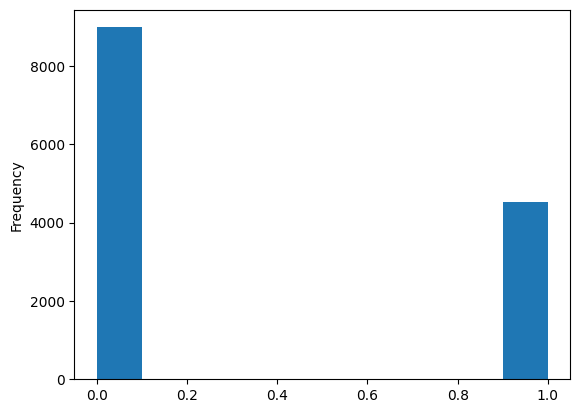

In [17]:
df_train["fraud_bool"].plot.hist()
vc = df_train["fraud_bool"].value_counts() / df_train["fraud_bool"].count()
vc=vc.apply(lambda values: "{:.2%}".format(values))
vc_df = pd.DataFrame([vc,df_train["fraud_bool"].value_counts()]).transpose()
vc_df.columns = ["percentage", "count"]
vc_df

<Axes: ylabel='Frequency'>

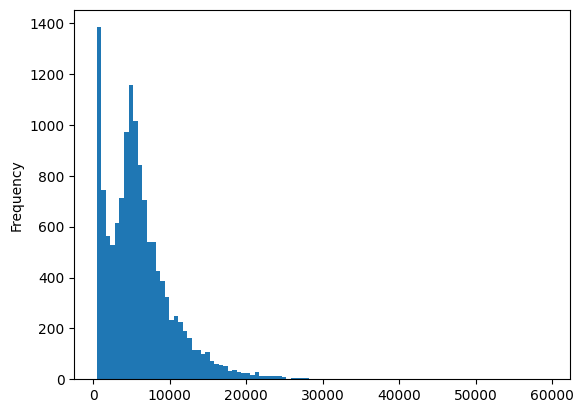

In [18]:
df_train["income"].plot.hist(bins=100)

Notiamo che `fraud_bool` è sbilanciato. Anche se in questo caso non parrebbe necessitare di modifiche, esistono diverse strategie di bilanciamento del dataset, come l'undersampling, l'oversampling o lo SMOTE, anche se questi metodi sono generalmente [sconsigliati](https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he). In questo caso mostreremo come utilizzare l'undersampling sul nostro dataset per bilanciare la variabile target binaria.

In [19]:
# undersampling on the train set wrt fraud_bool to reach a 50/50 ratio
df_train_1 = df_train[df_train["fraud_bool"] == 1]
df_train_0 = df_train[df_train["fraud_bool"] == 0].sample(n=df_train_1.shape[0], random_state=42)
df_train_rebalanced = pd.concat([df_train_0, df_train_1], axis=0)
df_train_rebalanced["fraud_bool"].value_counts()

fraud_bool
0    4519
1    4519
Name: count, dtype: int64

### Outliers e trasformazione features

Procediamo studiando la distribuzione delle feature di tipo numerico ed eventualmente trasformandole, processo che spesso rende più semplice la modellizazione.
Innanzituto visualizziamone la distribuzione:

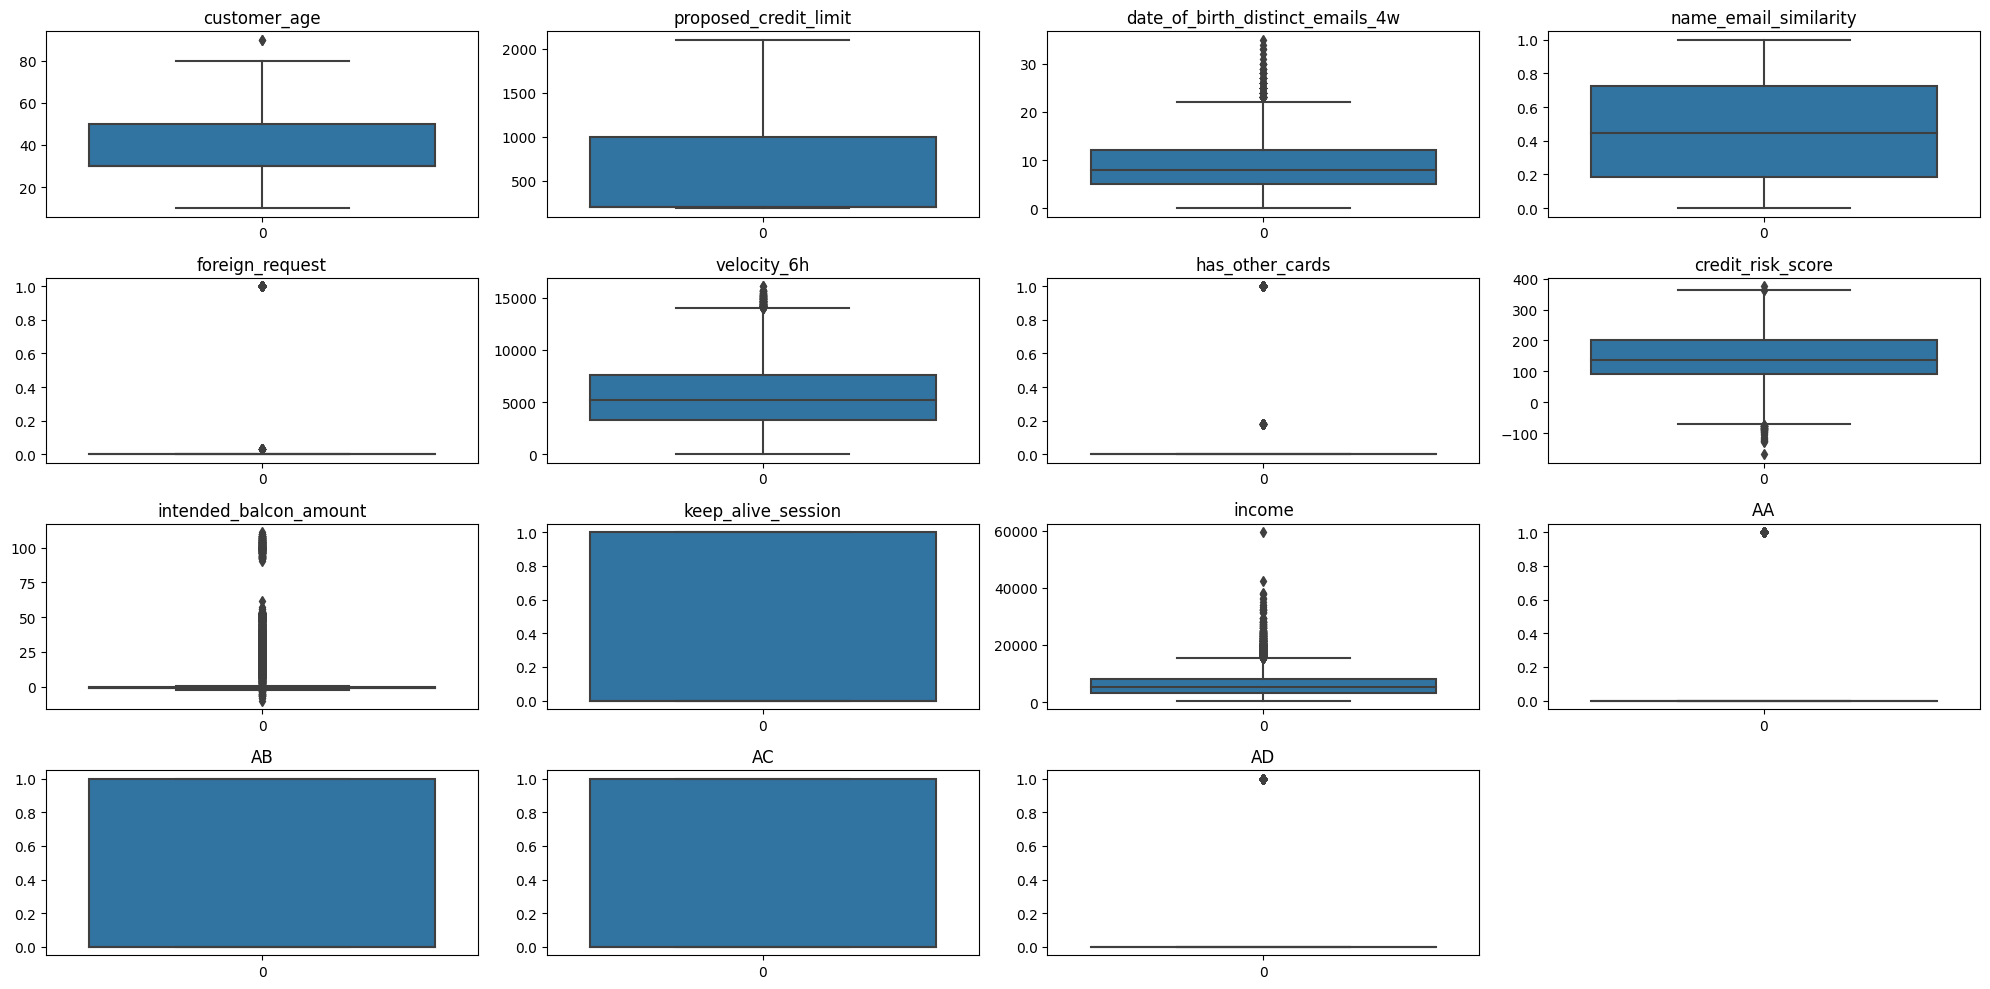

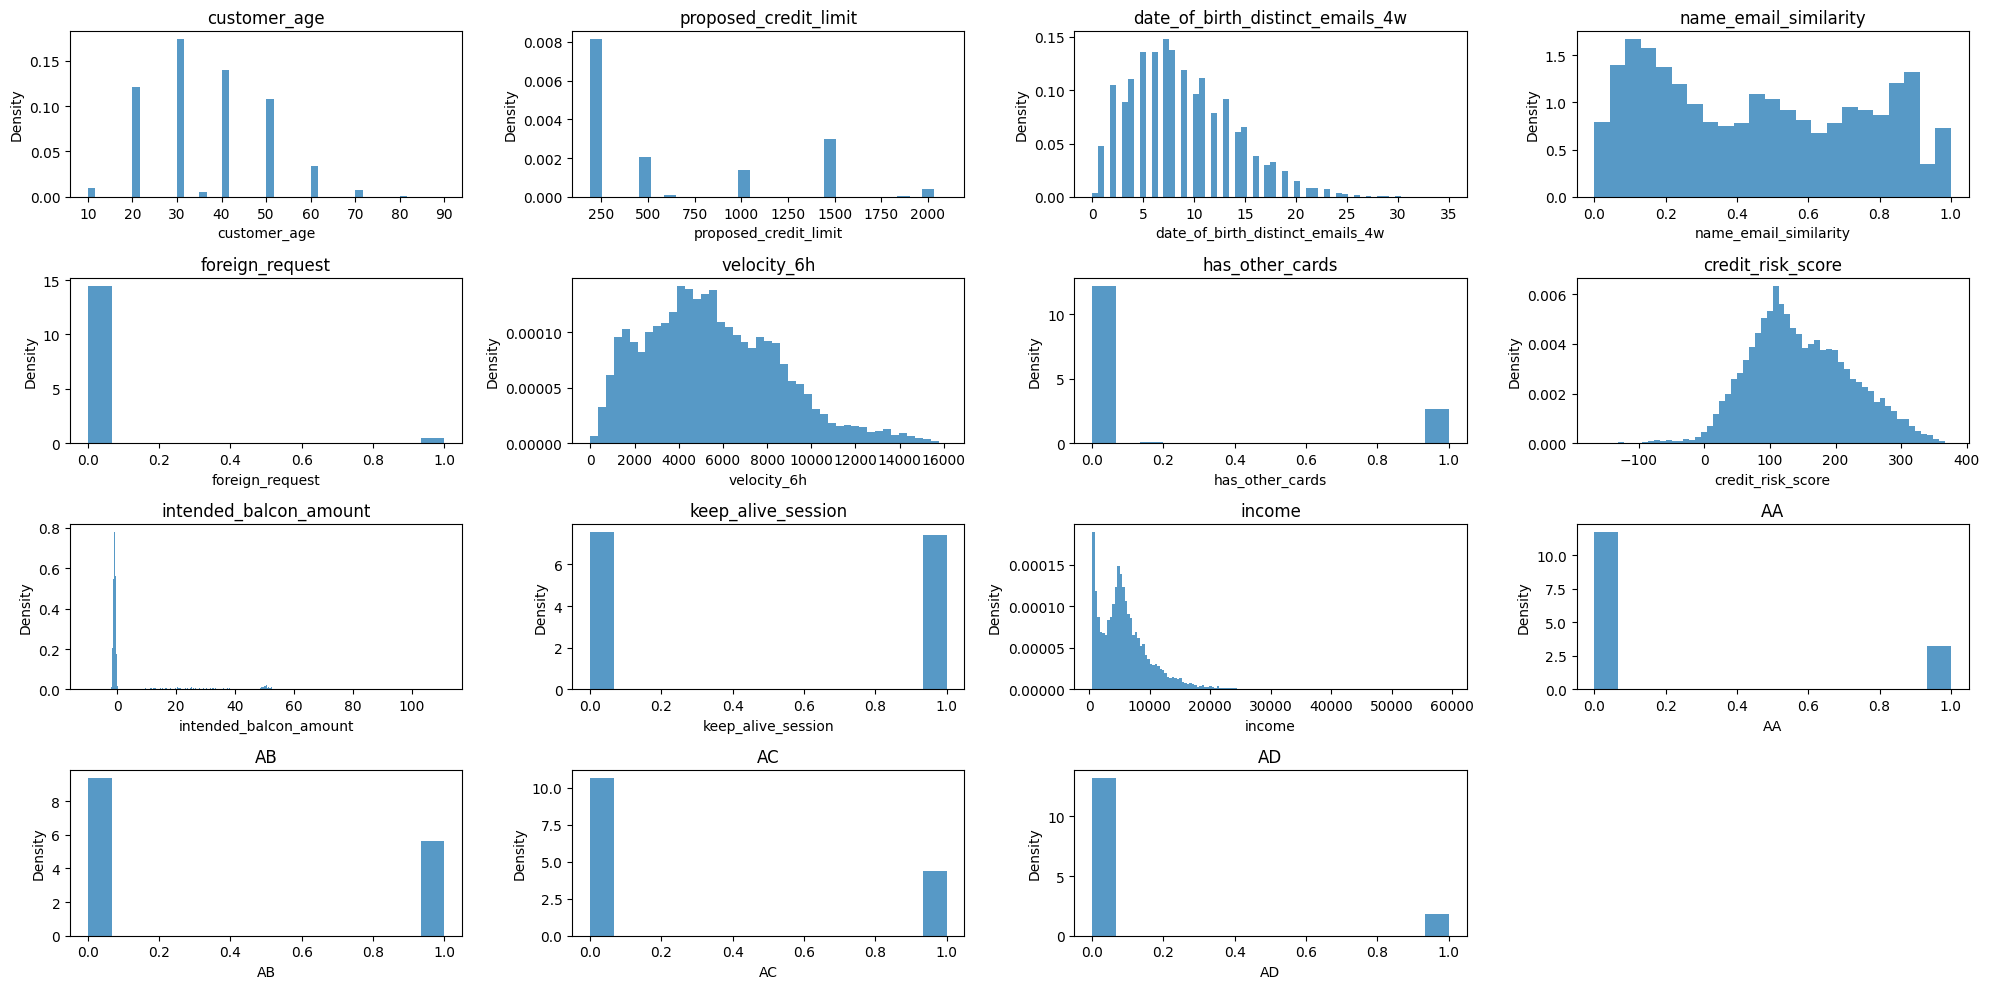

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

float_cols = (
    df_train.drop(columns=["fraud_bool"])
    .infer_objects()
    .select_dtypes(include=[int, float])
    .columns
)


def boxplot_grid(df):
    plt.figure(figsize=(20, 10))
    side = int(np.ceil(np.sqrt(len(df.columns))))
    for i, col in enumerate(df.columns):
        plt.subplot(side, side, i + 1)
        sns.boxplot(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()


def histplot_grid(df):
    plt.figure(figsize=(20, 10))
    side = int(np.ceil(np.sqrt(len(df.columns))))
    for i, col in enumerate(df.columns):
        plt.subplot(side, side, i + 1)
        sns.histplot(df[col], stat="density", linewidth=0)
        plt.title(col)
    plt.tight_layout()
    plt.show()


boxplot_grid(df_train[float_cols])
histplot_grid(df_train[float_cols])

Spesso è preferibile riscalare le variabili numeriche in modo normalizzarne la distribuzione. In questo caso useremo `PowerTransformer` di `sklearn`, che ci permette di trovare la power trasformation ottimale per le nostre features:

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,10,0,13500.0,2.178998e-16,1.000037,-2.531070,-0.387217,-0.387217,1.086212,3.303441
proposed_credit_limit,float64,13,0,13500.0,2.309317e-14,1.000037,-0.997940,-0.896983,-0.896983,1.085237,1.514385
date_of_birth_distinct_emails_4w,float64,37,0,13500.0,2.019784e-16,1.000037,-2.690837,-0.700036,-0.011540,0.718537,3.412566
name_email_similarity,float64,13376,0,13500.0,2.315843e-17,1.000037,-1.757638,-0.926329,0.056081,0.930422,1.669423
foreign_request,float64,3,0,13500.0,-1.210554e-17,1.000037,-0.191467,-0.191467,-0.191467,-0.191467,5.281089
velocity_6h,float64,13447,0,13500.0,-3.947460e-16,1.000037,-3.959524,-0.680425,0.022821,0.739768,2.722073
has_other_cards,float64,3,0,13500.0,8.421247e-18,1.000037,-0.473888,-0.473888,-0.473888,-0.473888,2.128106
credit_risk_score,float64,447,0,13500.0,-3.905353e-16,1.000037,-4.417916,-0.715477,-0.107817,0.688833,2.931615
intended_balcon_amount,float64,13486,0,13500.0,-2.000046e-17,1.000037,-29.066796,-0.553647,-0.249478,0.089035,1.994540
keep_alive_session,float64,3,0,13500.0,2.842171e-17,1.000037,-0.990654,-0.990654,-0.990654,1.010451,1.010451


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,9,0,1500.0,0.001547,0.998990,-2.531070,-0.387217,-0.387217,0.397038,2.807217
proposed_credit_limit,float64,11,0,1500.0,-0.016963,0.992377,-0.896983,-0.896983,-0.896983,1.085237,1.491796
date_of_birth_distinct_emails_4w,float64,31,0,1500.0,0.068900,0.985490,-2.690837,-0.700036,-0.011540,0.718537,3.136607
name_email_similarity,float64,1491,0,1500.0,0.070648,1.012009,-1.752402,-0.847896,0.151302,1.004916,1.669368
foreign_request,float64,3,0,1500.0,-0.000811,0.998267,-0.191467,-0.191467,-0.191467,-0.191467,5.281089
velocity_6h,float64,1495,0,1500.0,-0.000370,0.989482,-2.540743,-0.657139,0.030938,0.691580,2.602069
has_other_cards,float64,3,0,1500.0,0.033724,1.029246,-0.473888,-0.473888,-0.473888,-0.473888,2.128106
credit_risk_score,float64,341,0,1500.0,-0.003677,0.998897,-3.708408,-0.728453,-0.107817,0.688833,2.728570
intended_balcon_amount,float64,1500,0,1500.0,0.005018,0.991684,-12.134709,-0.544505,-0.251093,0.082078,1.992778
keep_alive_session,float64,3,0,1500.0,0.000009,1.000513,-0.990654,-0.990654,-0.990654,1.010451,1.010451


None

None

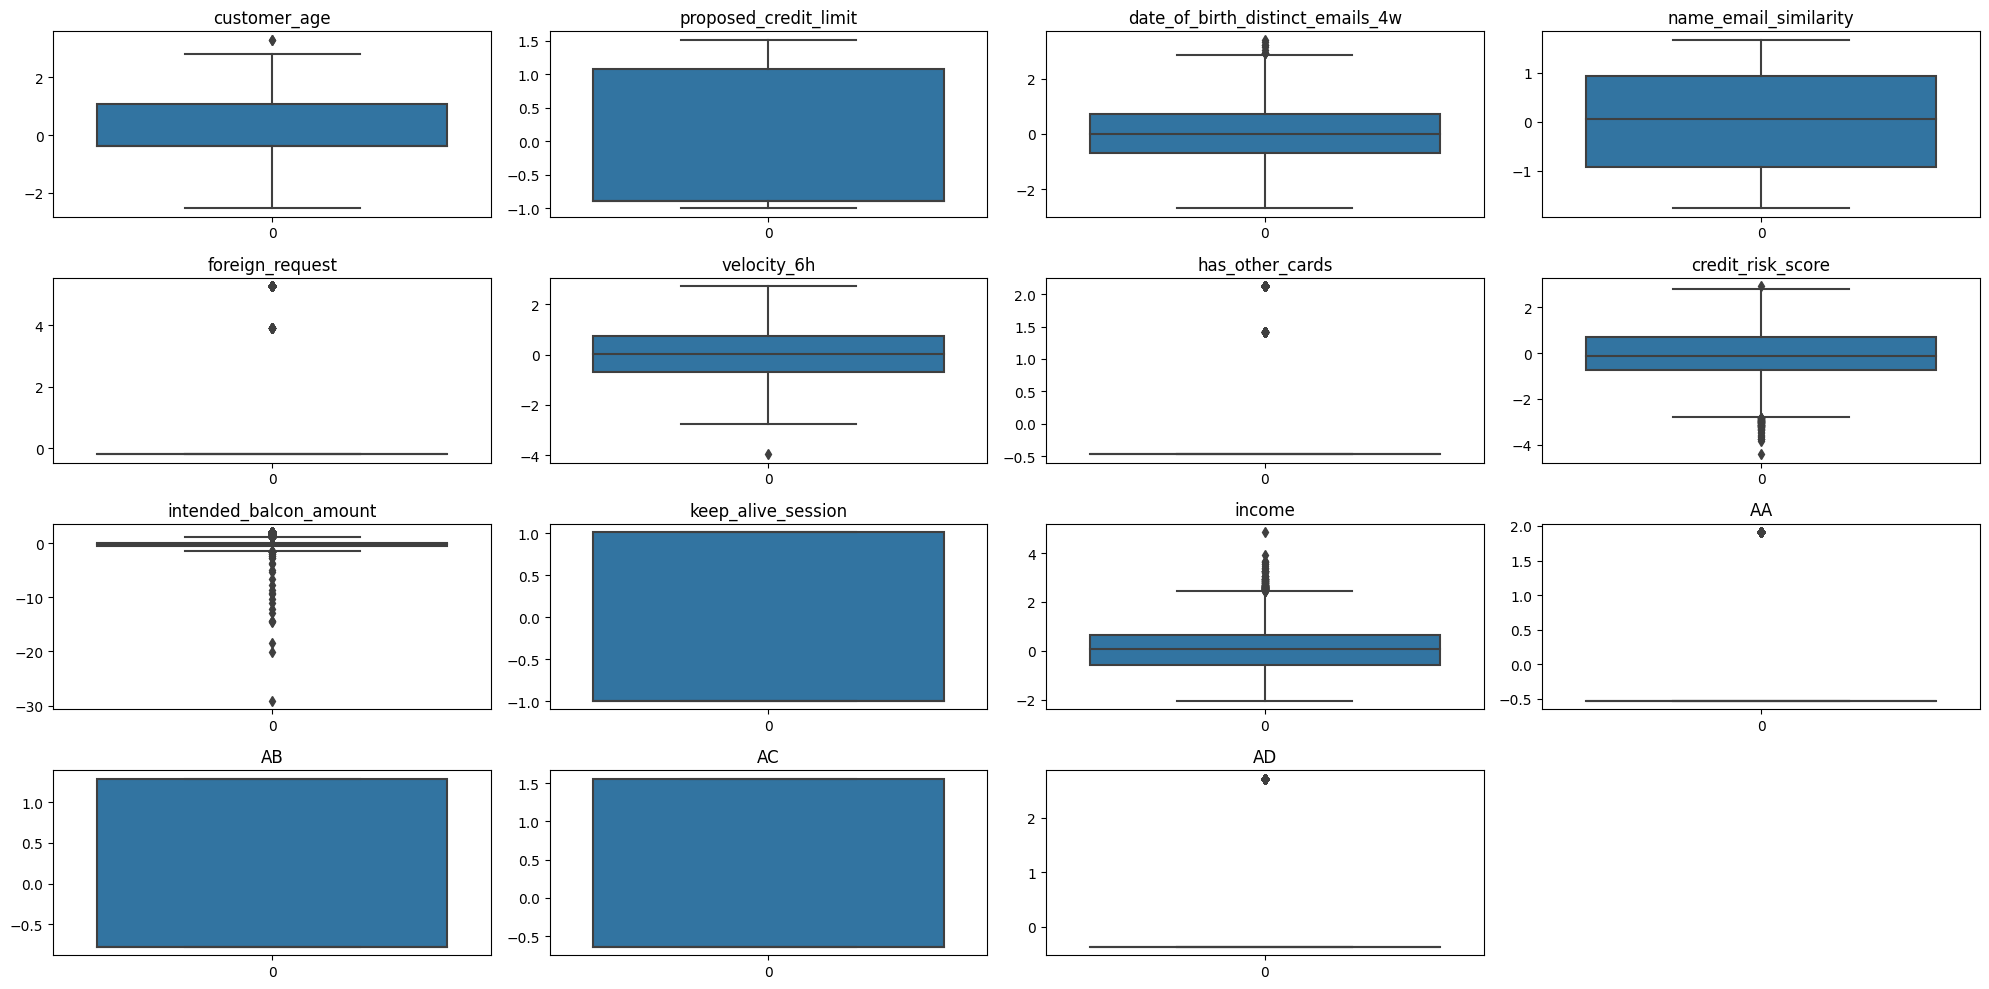

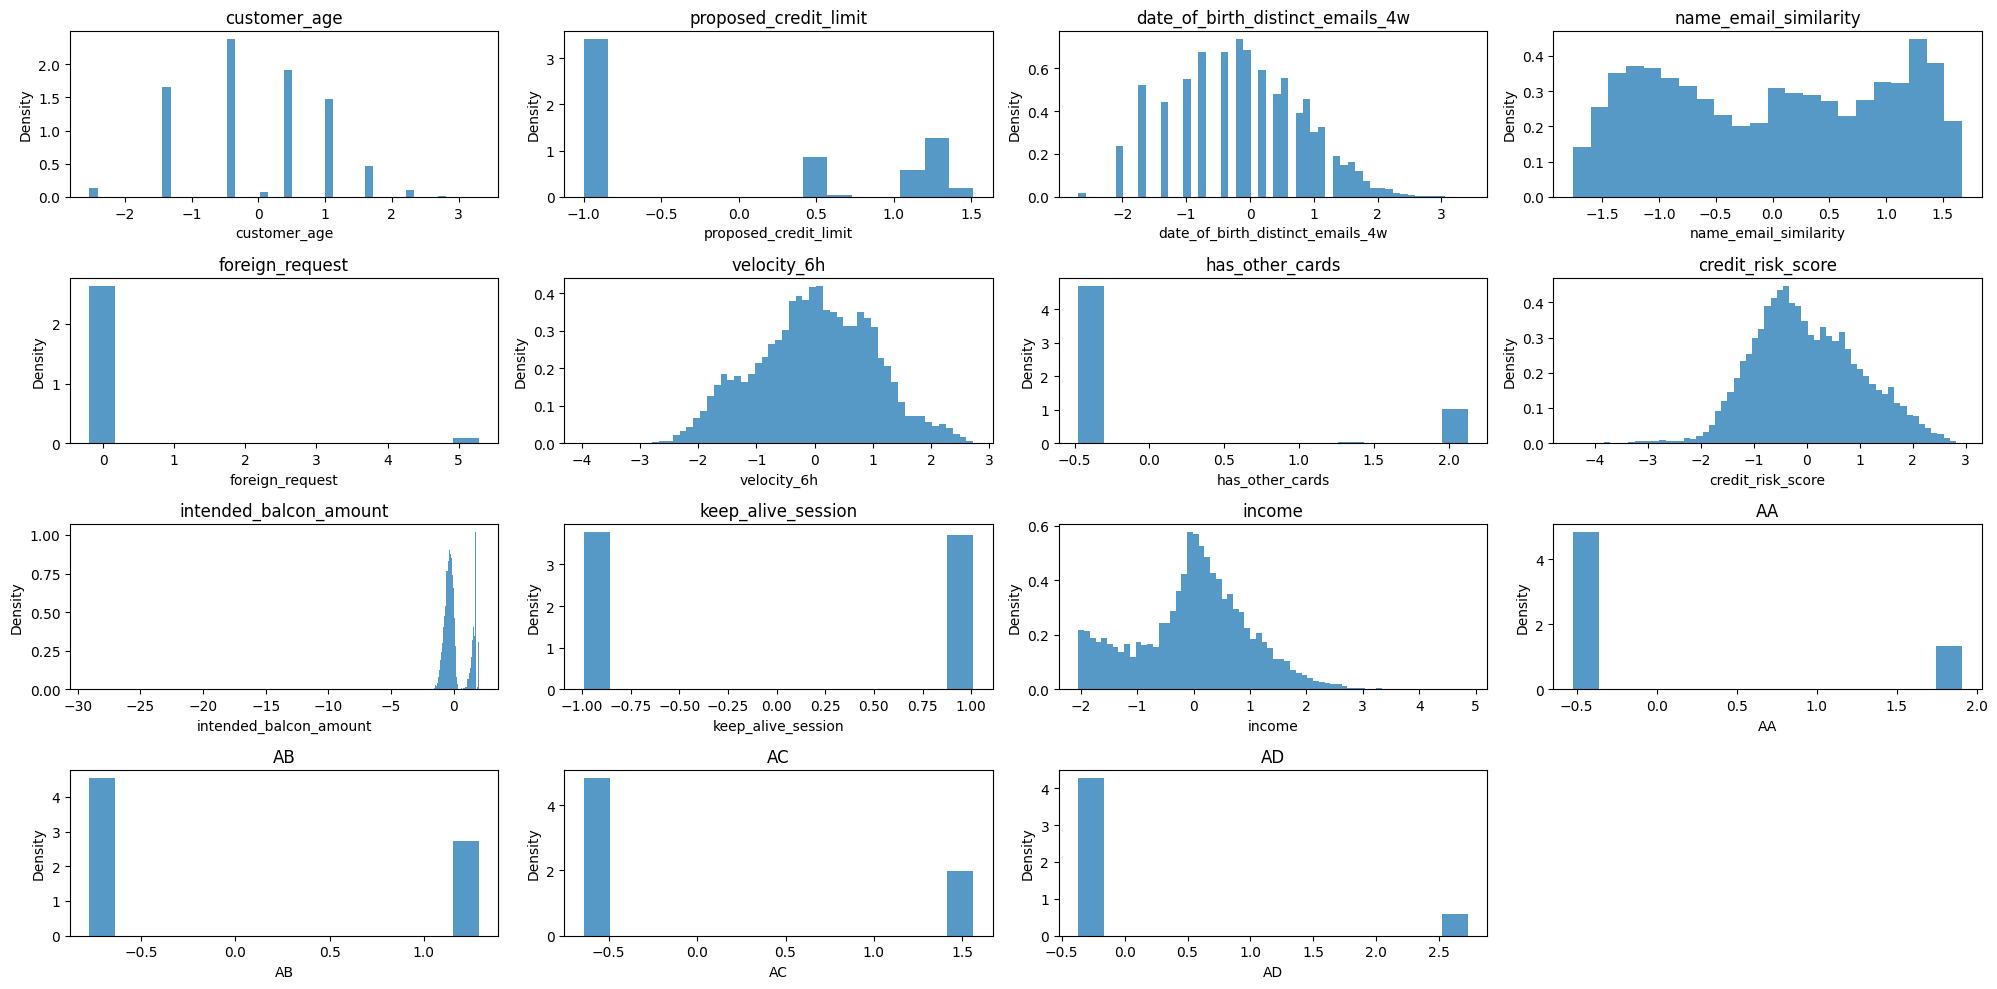

In [21]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

# Utilizzeremo queste copie successivamente
df_train_copy = df_train.copy(deep=True)
df_test_copy = df_test.copy(deep=True)

transformer = transformer.fit(df_train[float_cols])
df_train[float_cols]=transformer.transform(df_train[float_cols])
df_test[float_cols]=transformer.transform(df_test[float_cols])

display(get_info(df_train), get_info(df_test))

boxplot_grid(df_train[float_cols])
histplot_grid(df_train[float_cols])

Abbiamo quindi trasformato le nostre features in una forma più adatta ai passaggi successivi. Esistono altri metodi di trasformazione delle variabili, come `MinMaxScaler`, che rende una feature numerica compresa fra due valori fissati, e `StandardScaler`, che standardizza la feature. Qui sotto riportiamo un esempio di applicazione:

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,10,0,13500.0,0.324264,0.160100,0.0,0.250000,0.250000,0.500000,1.0
proposed_credit_limit,float64,13,0,13500.0,0.231123,0.297269,0.0,0.005236,0.005236,0.424084,1.0
date_of_birth_distinct_emails_4w,float64,37,0,13500.0,0.252693,0.144140,0.0,0.142857,0.228571,0.342857,1.0
name_email_similarity,float64,13376,0,13500.0,0.456407,0.292913,0.0,0.183256,0.443421,0.722540,1.0
foreign_request,float64,3,0,13500.0,0.033549,0.179891,0.0,0.000000,0.000000,0.000000,1.0
velocity_6h,float64,13447,0,13500.0,0.343445,0.185950,0.0,0.203624,0.322926,0.469609,1.0
has_other_cards,float64,3,0,13500.0,0.178681,0.381891,0.0,0.000000,0.000000,0.000000,1.0
credit_risk_score,float64,447,0,13500.0,0.578645,0.142236,0.0,0.476103,0.562500,0.676471,1.0
intended_balcon_amount,float64,13486,0,13500.0,0.141449,0.157596,0.0,0.072979,0.075758,0.079689,1.0
keep_alive_session,float64,3,0,13500.0,0.494958,0.499734,0.0,0.000000,0.000000,1.000000,1.0


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,9,0,1500.0,0.324479,0.161341,0.000000,0.250000,0.250000,0.375000,0.875000
proposed_credit_limit,float64,11,0,1500.0,0.223537,0.291442,0.005236,0.005236,0.005236,0.424084,0.947644
date_of_birth_distinct_emails_4w,float64,31,0,1500.0,0.261943,0.145083,0.000000,0.142857,0.228571,0.342857,0.914286
name_email_similarity,float64,1491,0,1500.0,0.477858,0.297624,0.001061,0.202186,0.471486,0.748674,0.999978
foreign_request,float64,3,0,1500.0,0.033400,0.179559,0.000000,0.000000,0.000000,0.000000,1.000000
velocity_6h,float64,1495,0,1500.0,0.342837,0.184147,0.015592,0.207174,0.324447,0.458977,0.962849
has_other_cards,float64,3,0,1500.0,0.193262,0.394368,0.000000,0.000000,0.000000,0.000000,1.000000
credit_risk_score,float64,341,0,1500.0,0.578126,0.142068,0.086397,0.474265,0.562500,0.676471,0.970588
intended_balcon_amount,float64,1500,0,1500.0,0.145862,0.166722,0.030696,0.073056,0.075742,0.079594,0.994699
keep_alive_session,float64,3,0,1500.0,0.494997,0.499975,0.000000,0.000000,0.000000,1.000000,1.000000


None

None

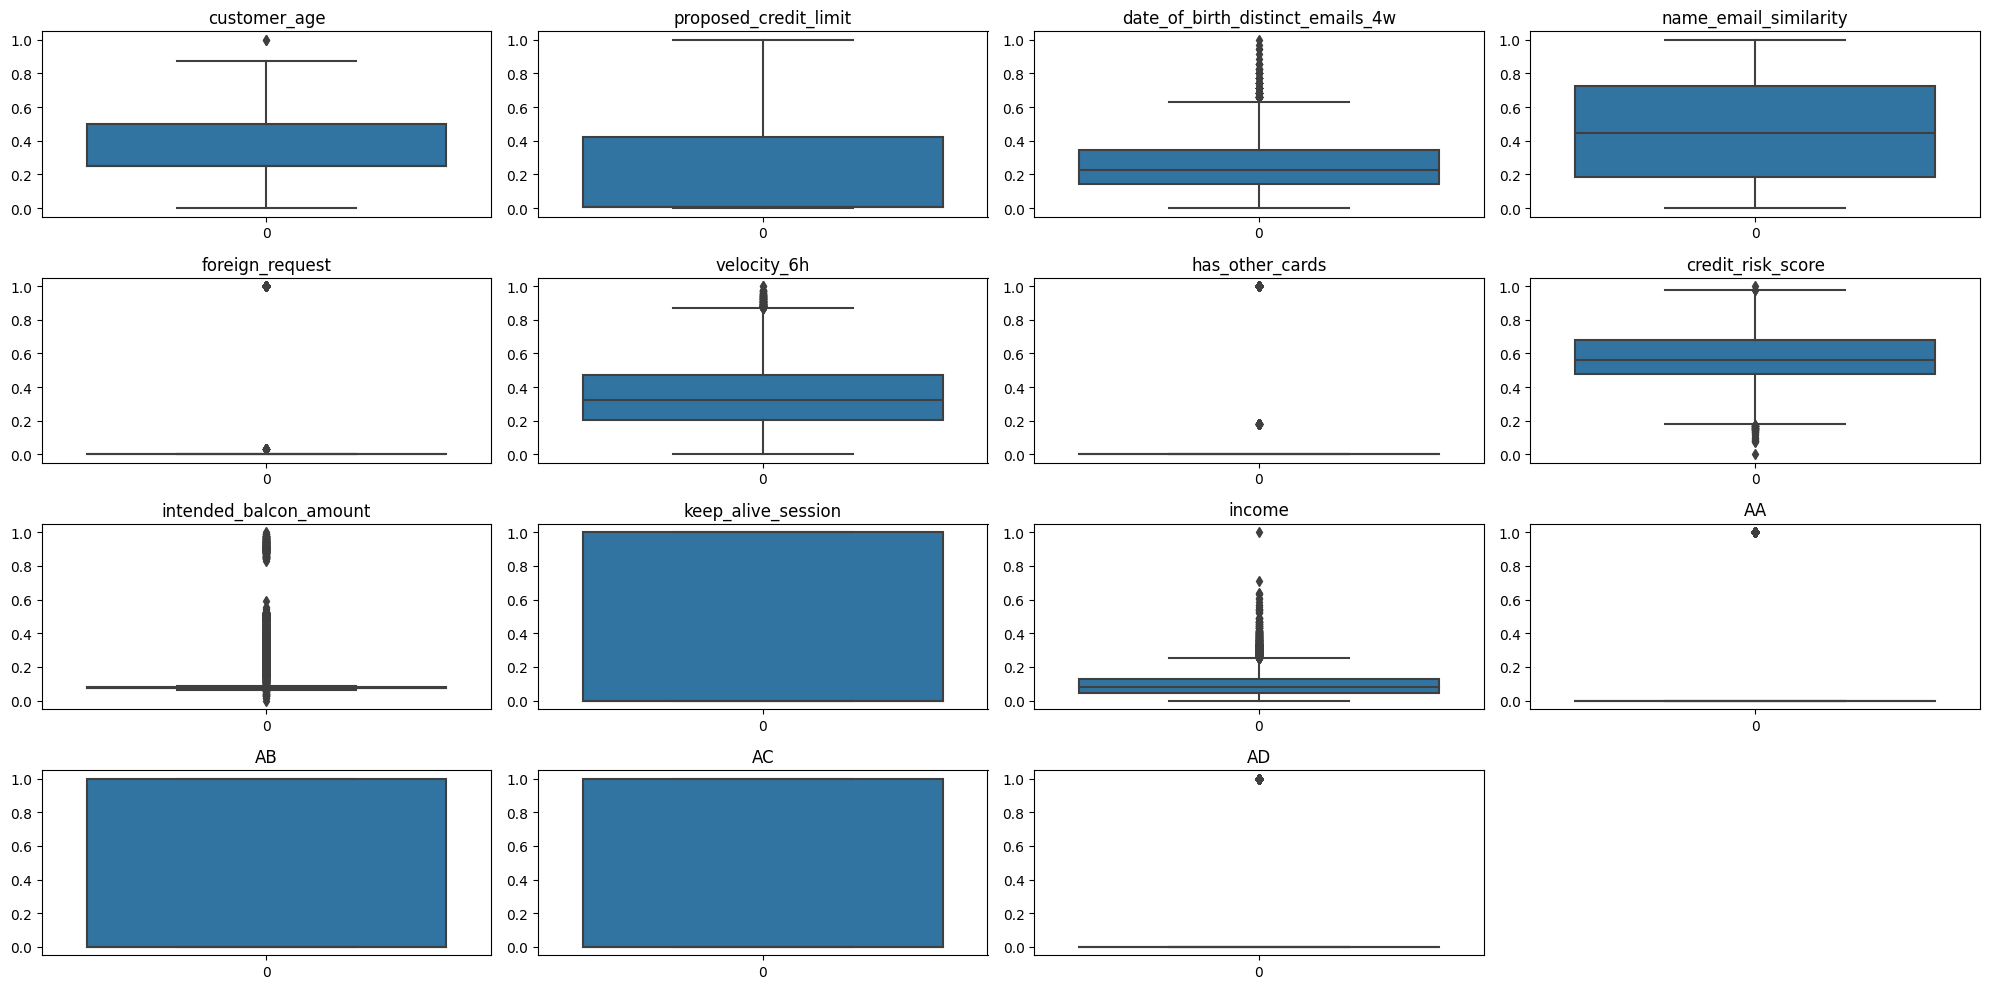

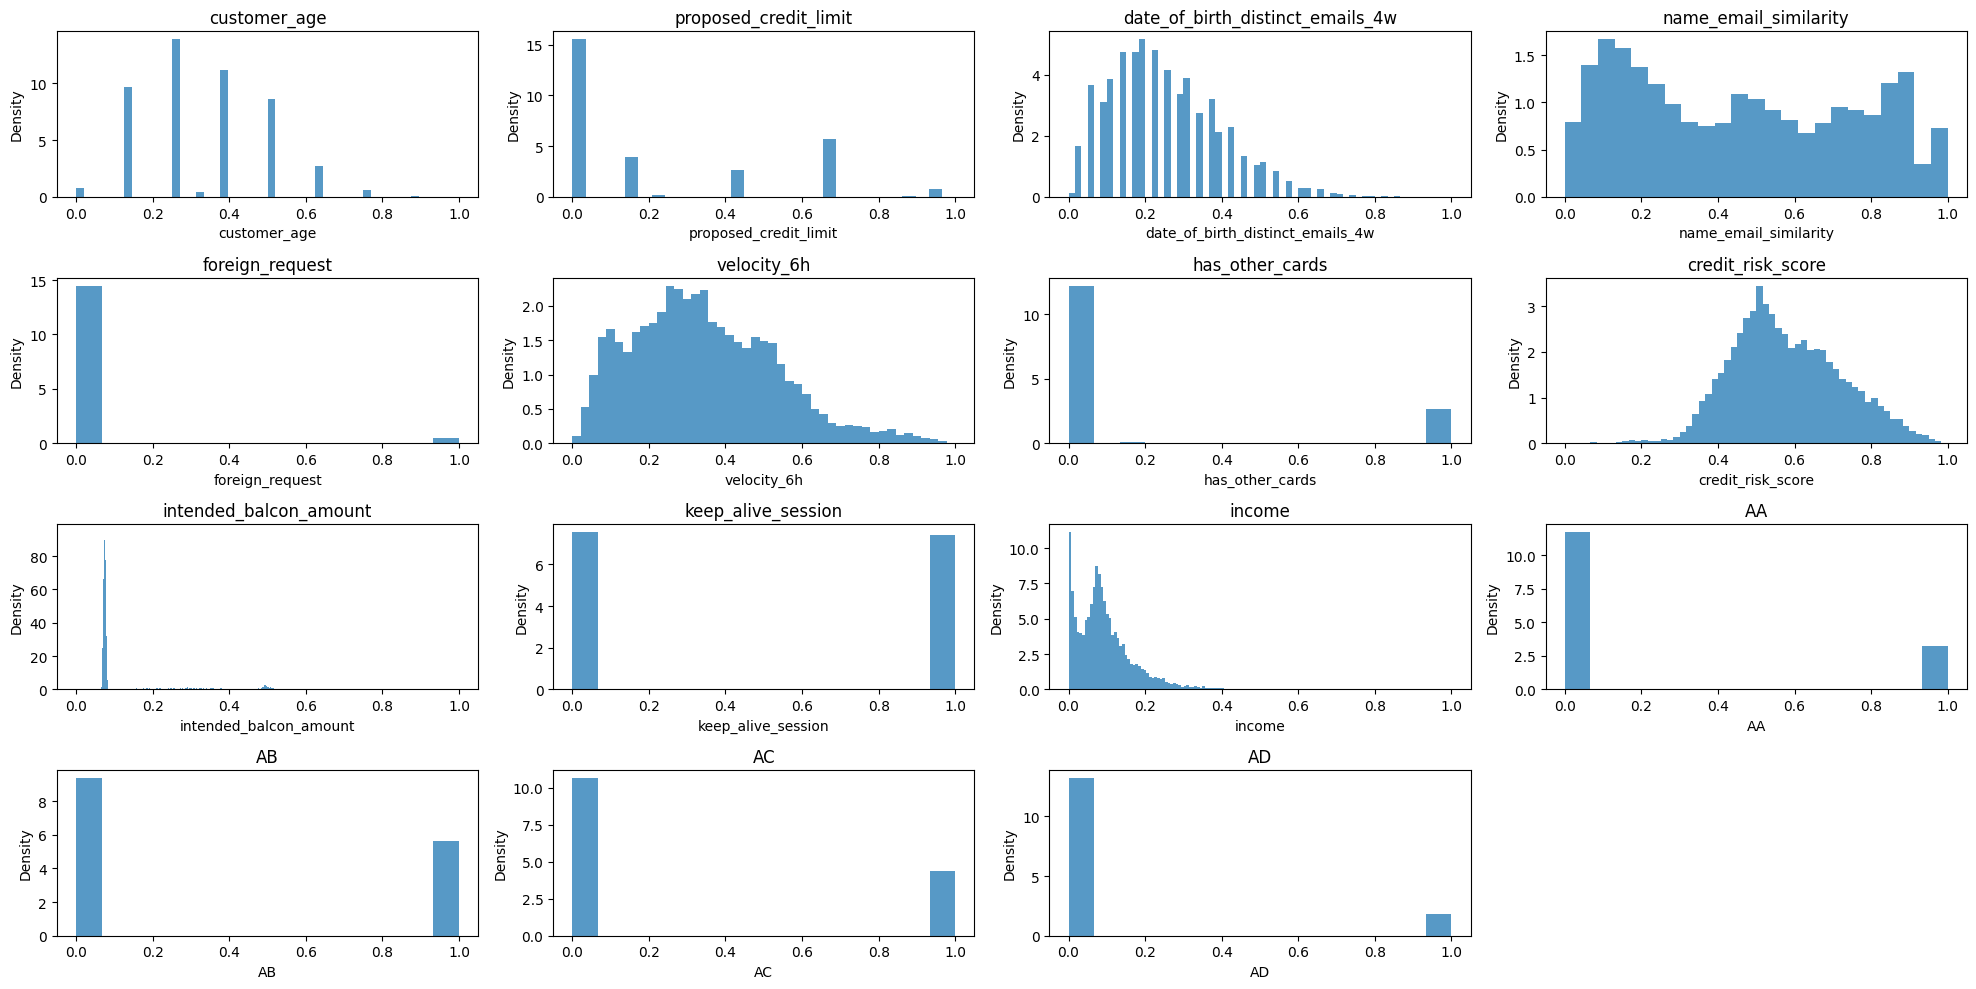

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df_train_copy[float_cols])
df_train_normalized, df_test_normalized = pd.DataFrame(), pd.DataFrame()
# Train
df_train_normalized[float_cols] = min_max_scaler.transform(df_train_copy[float_cols])
# Test
df_test_normalized[float_cols] = min_max_scaler.transform(df_test_copy[float_cols])

display(
    get_info(df_train_normalized),
    get_info(df_test_normalized),
)
boxplot_grid(df_train_normalized[float_cols])
histplot_grid(df_train_normalized[float_cols])

,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,10,0,13500.0,4.536947e-16,1.000037,-2.025461,-0.463879,-0.463879,1.097703,4.220867
proposed_credit_limit,float64,13,0,13500.0,1.010550e-16,1.000037,-0.777517,-0.759904,-0.759904,0.649134,2.586560
date_of_birth_distinct_emails_4w,float64,37,0,13500.0,-1.052656e-17,1.000037,-1.753177,-0.762037,-0.167353,0.625558,5.184800
name_email_similarity,float64,13376,0,13500.0,-6.158037e-17,1.000037,-1.558221,-0.932567,-0.044336,0.908606,1.855883
foreign_request,float64,3,0,13500.0,2.763222e-17,1.000037,-0.186501,-0.186501,-0.186501,-0.186501,5.372639
velocity_6h,float64,13447,0,13500.0,6.631732e-17,1.000037,-1.847047,-0.751958,-0.110350,0.678512,3.530952
has_other_cards,float64,3,0,13500.0,-4.631686e-17,1.000037,-0.467901,-0.467901,-0.467901,-0.467901,2.150745
credit_risk_score,float64,447,0,13500.0,1.747409e-16,1.000037,-4.068367,-0.720961,-0.113516,0.687793,2.962479
intended_balcon_amount,float64,13486,0,13500.0,3.473764e-17,1.000037,-0.897571,-0.434478,-0.416843,-0.391898,5.447991
keep_alive_session,float64,3,0,13500.0,6.842263e-18,1.000037,-0.990480,-0.990480,-0.990480,1.010660,1.010660


,dtypes,n_unique,nan_vals,count,mean,std,min,25%,50%,75%,max
customer_age,float64,9,0,1500.0,0.001344,1.007787,-2.025461,-0.463879,-0.463879,0.316912,3.440076
proposed_credit_limit,float64,11,0,1500.0,-0.025520,0.980432,-0.759904,-0.759904,-0.759904,0.649134,2.410430
date_of_birth_distinct_emails_4w,float64,31,0,1500.0,0.064177,1.006580,-1.753177,-0.762037,-0.167353,0.625558,4.590117
name_email_similarity,float64,1491,0,1500.0,0.073234,1.016119,-1.554600,-0.867937,0.051483,0.997830,1.855808
foreign_request,float64,3,0,1500.0,-0.000824,0.998195,-0.186501,-0.186501,-0.186501,-0.186501,5.372639
velocity_6h,float64,1495,0,1500.0,-0.003268,0.990345,-1.763194,-0.732865,-0.102169,0.621330,3.331152
has_other_cards,float64,3,0,1500.0,0.038184,1.032711,-0.467901,-0.467901,-0.467901,-0.467901,2.150745
credit_risk_score,float64,341,0,1500.0,-0.003653,0.998860,-3.460923,-0.733885,-0.113516,0.687793,2.755689
intended_balcon_amount,float64,1500,0,1500.0,0.028008,1.057944,-0.702789,-0.433990,-0.416946,-0.392503,5.414354
keep_alive_session,float64,3,0,1500.0,0.000078,1.000520,-0.990480,-0.990480,-0.990480,1.010660,1.010660


None

None

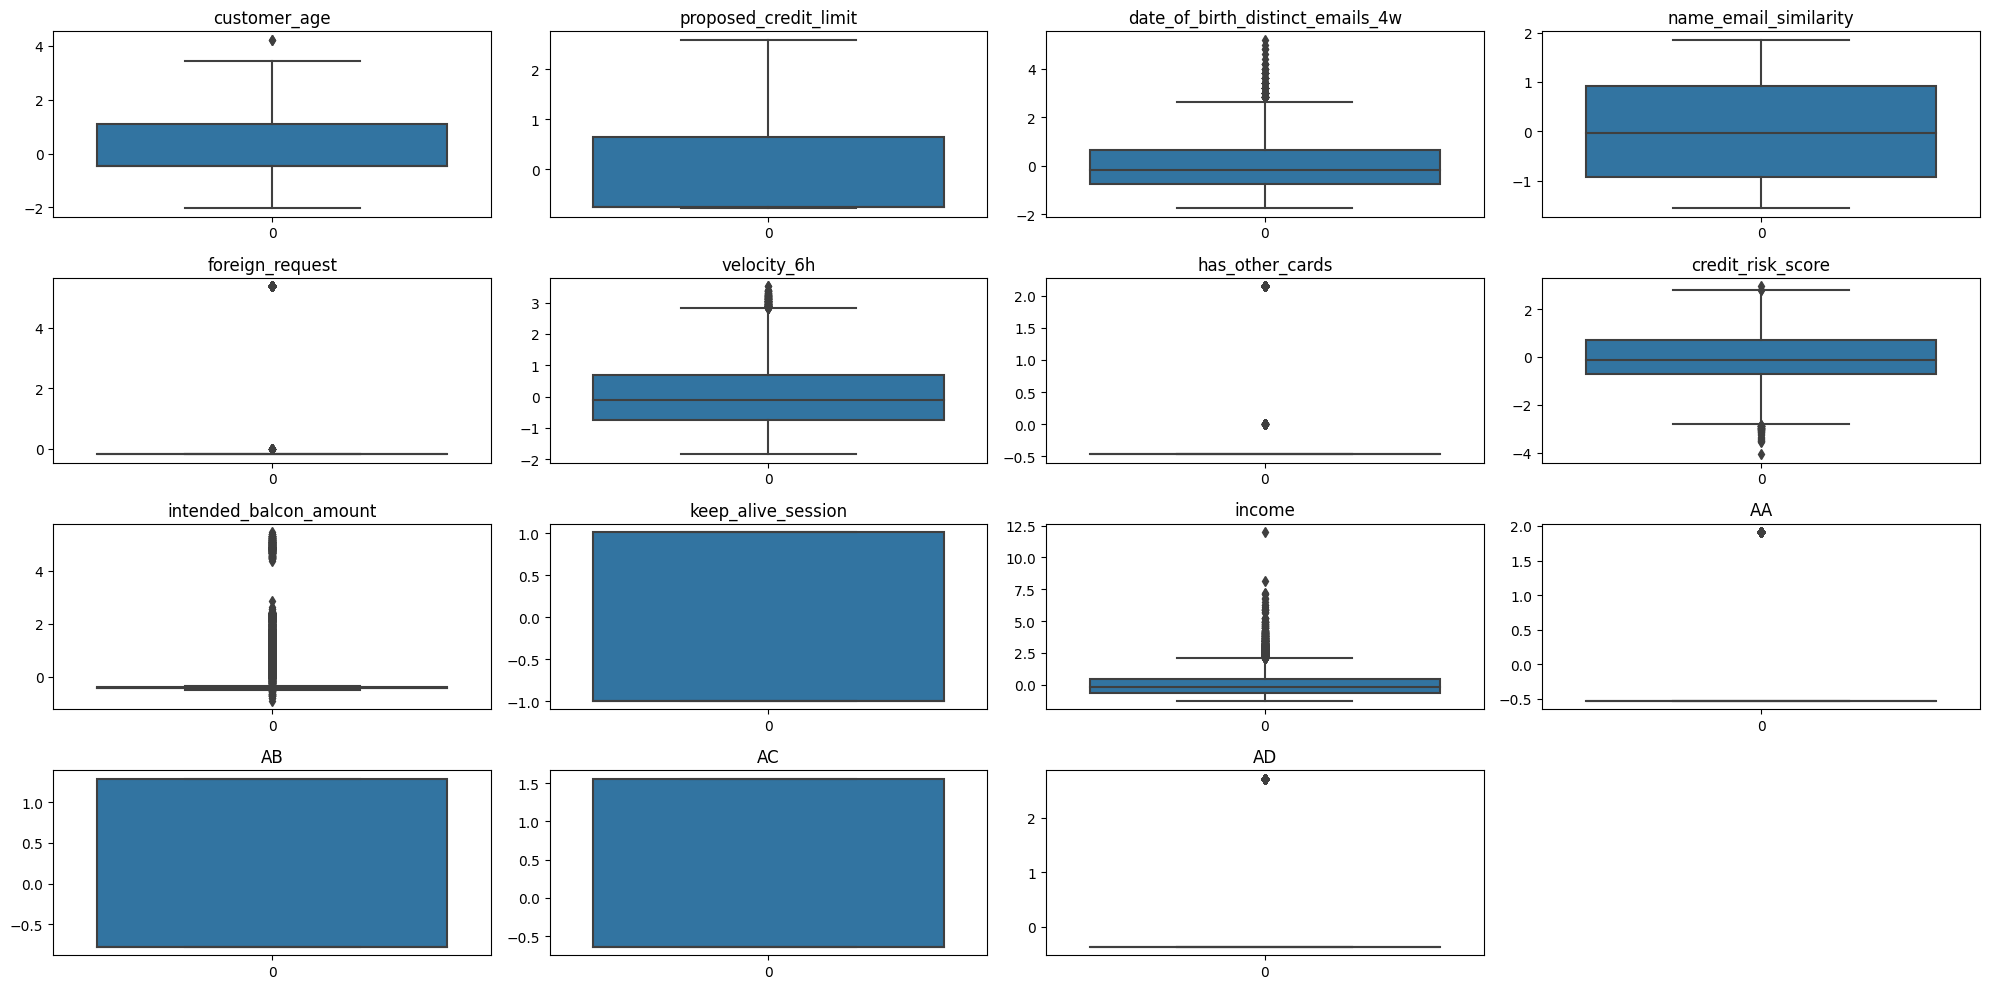

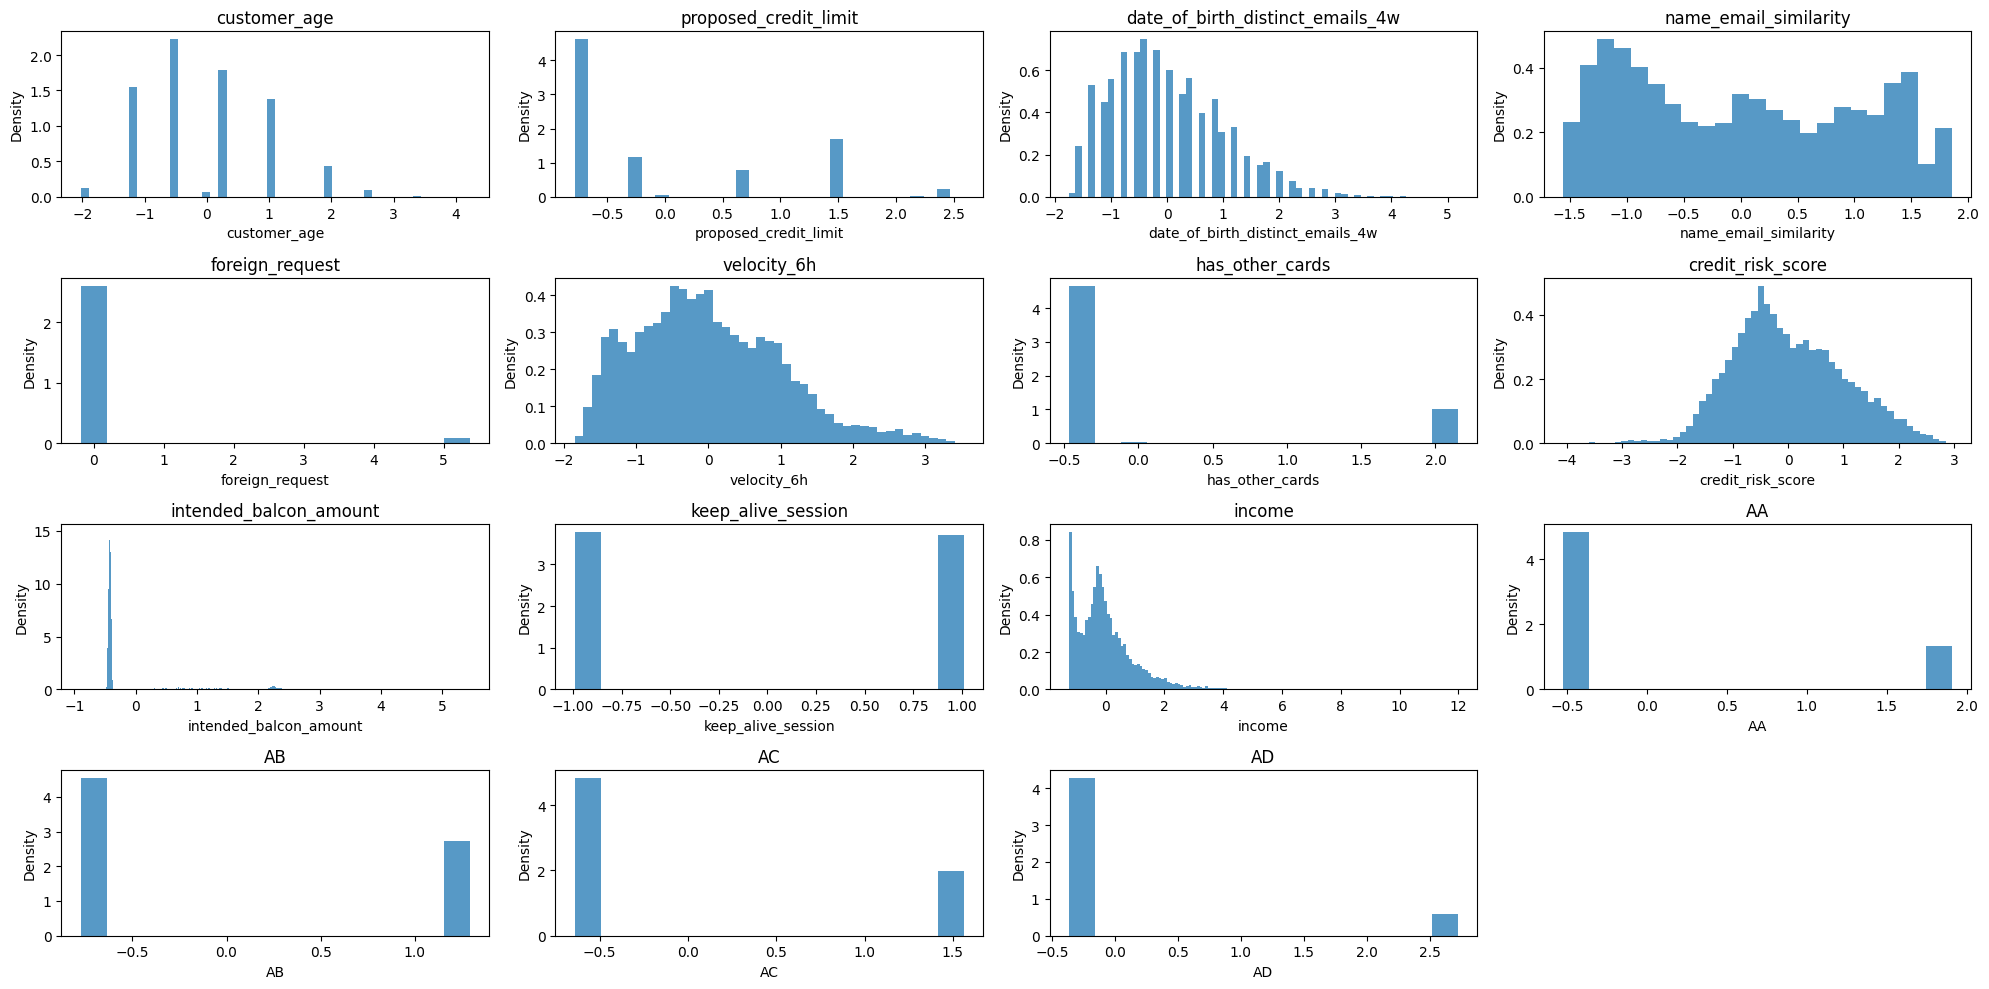

In [23]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_train_copy[float_cols])
df_train_standardized, df_test_standardized = pd.DataFrame(), pd.DataFrame()
# Train
df_train_standardized[float_cols] = standard_scaler.transform(df_train_copy[float_cols])
# Test
df_test_standardized[float_cols] = standard_scaler.transform(df_test_copy[float_cols])

display(
    get_info(df_train_standardized),
    get_info(df_test_standardized),
)
boxplot_grid(df_train_standardized[float_cols])
histplot_grid(df_train_standardized[float_cols])

Queste trasformazioni sono molto utili ma potremmo chiederci come invertirle, ovvero ottenere i dati originali.
Soluzione: ogni classe di `scikit-learn` per trasformazioni invertibili implementa (una volta fittata) un metodo `inverse_transform`.

In [24]:
def inverse_transform_df(df, scaler):
    # Questa funzione applica il metodo `inverse_transform` di un'oggetto scaler ad un dataframe df
    return pd.DataFrame(
        scaler.inverse_transform(df),
        columns=df.columns,
    )

# Applichiamo la trasformazione inversa alle colonne appena trattate
inverted_df = inverse_transform_df(df_test[float_cols], transformer)

# Controlliamo che il risultato corrisponda effettivamente al dataframe originale
np.allclose(inverted_df[float_cols], df_test_copy[float_cols], rtol=1e-05, atol=1e-08, equal_nan=False)

False

## Calcolo delle correlazioni

La correlazione tra caratteristiche (features) e obiettivo (target) sottintende il rapporto lineare tra le variabili indipendenti (o caratteristiche) e la variabile dipendente (o obiettivo). Viene utilizzato per quantificare il grado in cui un cambiamento nelle caratteristiche può influenzare il target. Può essere utile, nel caso di modelli lineari, per selezionare le variabili più promettenti in fase di modellizzazione.

Nel prossimo notebook creeremo modelli di regressione e classificazione per i target `income` e `fraud_bool`, quindi valutiamo la correlazione delle features con questi due possibili target.

<Axes: >

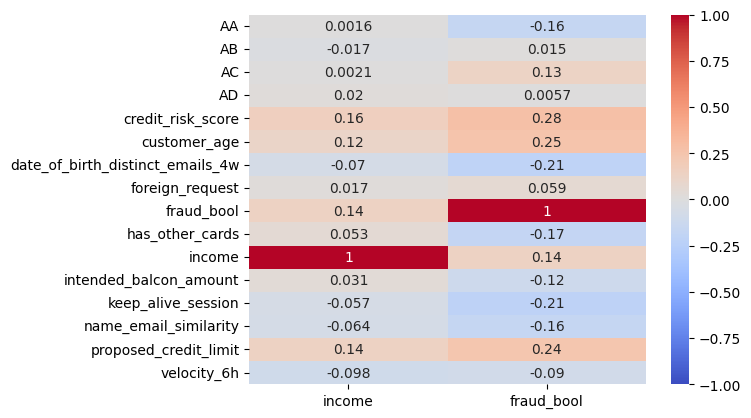

In [34]:
bc_corr = df_train.corr(numeric_only=True)["income"].sort_values()
iac_corr = df_train.corr(numeric_only=True)["fraud_bool"].sort_values()
corr_df=pd.DataFrame(
    {
        "income": bc_corr,
        "fraud_bool": iac_corr,
    }
)
sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Export dei dataset

Ora che i nostri dati sono pronti per la modellizzazione esportiamoli in due `csv` distinti, pronti per i prossimi passaggi:

In [29]:
df_train.to_csv("../Day3-MachineLearning/datasets/train.csv", index=False)
df_test.to_csv("../Day3-MachineLearning/datasets/test.csv", index=False)